In [13]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [14]:
DATA_DIR = Path("./data/")
df = pd.read_csv(DATA_DIR / "train.csv")

In [15]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


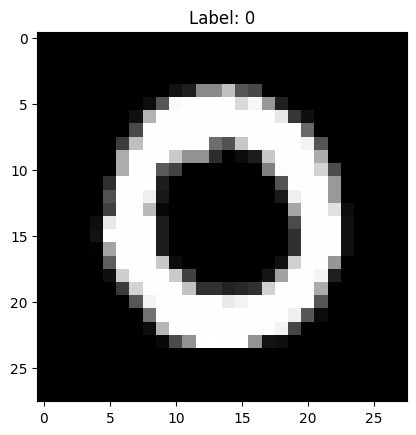

In [21]:
index = 1

pixels = df.filter(like="pixel")
sample_digit = pixels.iloc[index].values
sample_digit = sample_digit.reshape(28, 28)
plt.imshow(sample_digit, cmap="gray")
plt.title(f"Label: {df.label.iloc[index]}");

In [ ]:
def vector2img(index):
    
    index = 1

    pixels = df.filter(like="pixel")
    sample_digit = pixels.iloc[index].values
    sample_digit = sample_digit.reshape(28, 28)
    plt.imshow(sample_digit, cmap="gray")
    plt.title(f"Label: {df.label.iloc[index]}");